# Filtering and magnitude spectra 
### George Tzanetakis, University of Victoria 

In this notebook we can observe the effect of filtering using magnitude spectra. 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy.io.wavfile as wav



In [2]:
srate, x = wav.read('noise.wav')
ipd.Audio(x,rate=srate)

In [3]:
srate, lx = wav.read('noise_lpass.wav')
ipd.Audio(lx,rate=srate)

In [4]:
srate, hx = wav.read('noise_hpass.wav')
ipd.Audio(hx,rate=srate)

Let's now look at the magnitude spectra of these three recordings. Notice how the low frequencies of the low pass version are boosted and attenuated in the high pass spectrum. The flat orange spectrum is the original noise signal. 

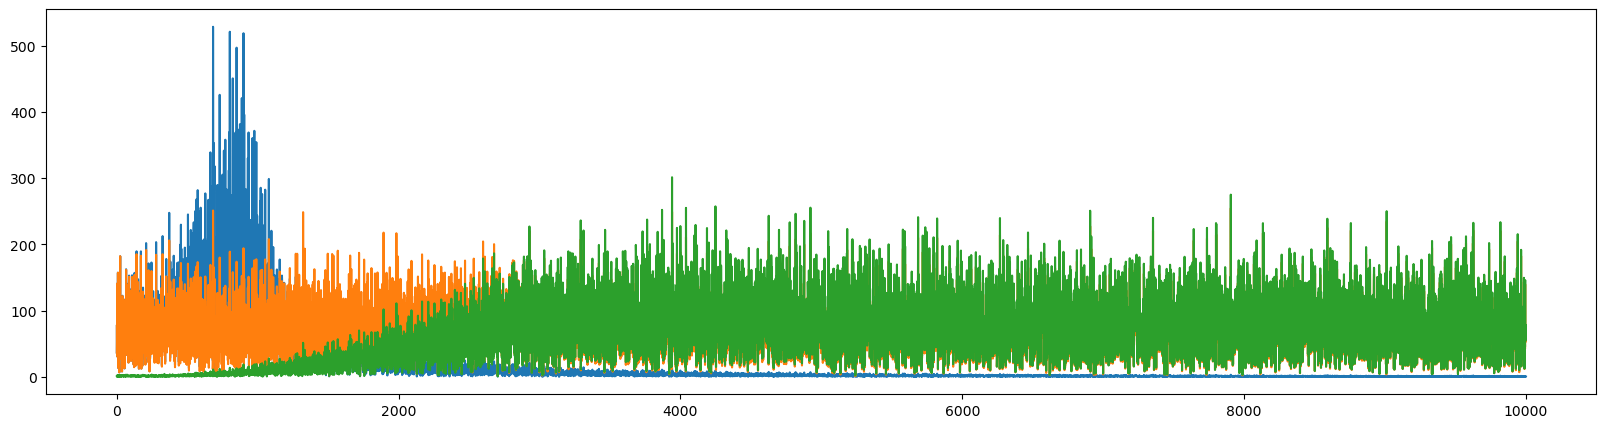

In [5]:
def plot_mag_spectra(Xmag1, Xmag2, Xmag3): 
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag1))
    plt.plot(n,Xmag1)
    plt.plot(n,Xmag2)
    plt.plot(n,Xmag3)

    
N = len(x)
X = np.fft.fft(x)
lX = np.fft.fft(lx)
hX = np.fft.fft(hx)
Xmag = 2 * np.abs(X) / N 
lXmag = 2 * np.abs(lX) / N 
hXmag = 2 * np.abs(hX) / N 
plot_mag_spectra(lXmag[0:10000], Xmag[0:10000], hXmag[0:10000])

In [6]:
srate, x = wav.read('freddie3sec.wav')
ipd.Audio(x,rate=srate)

In [7]:
srate, lx = wav.read('freddie3sec_lpass.wav')
ipd.Audio(lx,rate=srate)

In [8]:
srate, hx = wav.read('freddie3sec_hpass.wav')
ipd.Audio(hx, rate=srate)

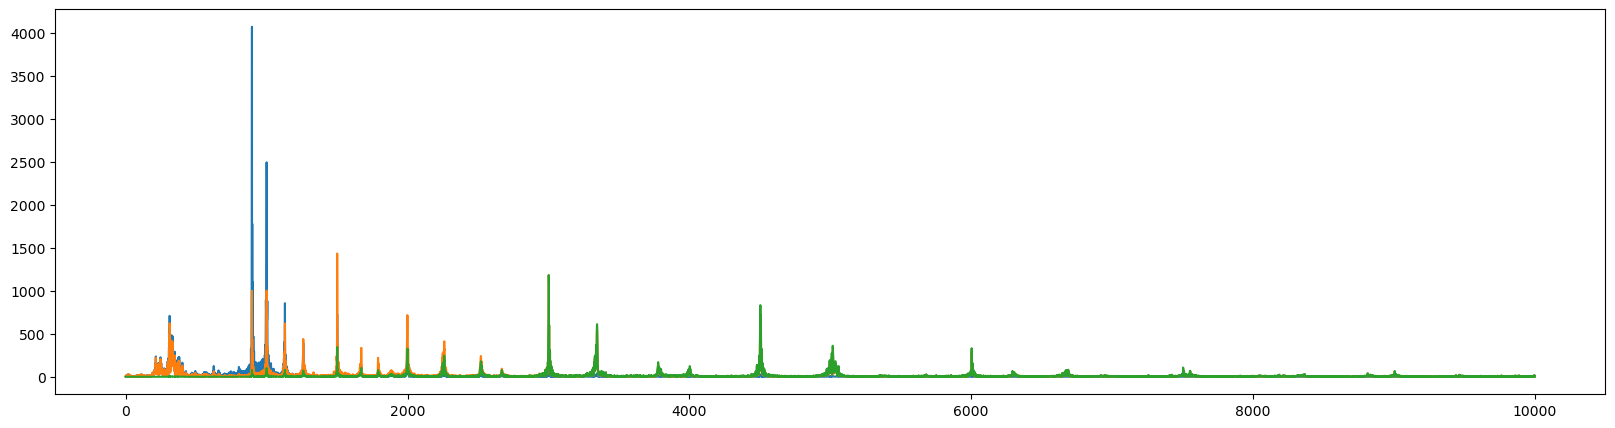

In [9]:
N = len(x)
X = np.fft.fft(x)
lX = np.fft.fft(lx)
hX = np.fft.fft(hx)
Xmag = 2 * np.abs(X) / N 
lXmag = 2 * np.abs(lX) / N 
hXmag = 2 * np.abs(hX) / N 
plot_mag_spectra(lXmag[0:10000], Xmag[0:10000], hXmag[0:10000])

In [75]:
import numpy as np 

# complete the function k_harmonics  
def k_harmonics_arp(k, amp, freq, duration, sample_rate): 
    t = np.arange(0, k * duration, 1/sample_rate)
    print(t.shape)
    audio = np.zeros(t.shape[0])
    for i in range(k):
        freqi = (i+1)*freq
        note_size = int(duration * sample_rate)
        haudio = amp * np.sin(2 * np.pi * freqi * t[:note_size])
        audio[i*note_size:(i+1)*note_size] = haudio
    return audio

# use the code in a notebook cell to plot/listen to the resulting 
# signal of the k_harmonics function 
f0 = 220
sr = 22050
amp = 0.25
duration = 0.125
k = 12
repetitions = [] 
for j in range(4): 
    signal = k_harmonics_arp(k, amp, f0, duration, sr)
    repetitions.append(signal)
print(signal.shape)
print(output.shape)
output = np.concatenate(repetitions, axis=0)
ipd.Audio(output, rate=sr)

(33075,)
(33075,)
(33075,)
(33075,)
(33075,)
(26464,)


In [65]:
1000 / 125
125 / 1000 

0.125